<a href="https://colab.research.google.com/github/DadenDharmawan/Data-Analytics/blob/main/Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background

---

Pulau Sumatera memiliki lebih dari 50% lahan pertanian di setiap provinsinya, dengan padi sebagai komoditas pangan utama yang dominan, dan komoditas minor seperti jagung, kacang tanah, dan ubi jalar. Hasil pertanian di pulau ini sangat rentan terhadap perubahan iklim, berdampak pada pola tanam, waktu tanam, produksi, dan kualitas hasil panen. Peningkatan suhu bumi akibat pemanasan global dapat memengaruhi pola curah hujan, penguapan, aliran air, kelembaban tanah, dan variasi iklim secara keseluruhan, mengancam keberhasilan produksi pertanian.

# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/DadenDharmawan/Data-Analytics/main/Data_Tanaman_Padi_Sumatera_version_1.csv')

# Data Understanding

In [3]:
df.sample(5)

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
165,Sumatera Selatan,2018,2994191.84,581574.61,2252.4,77.66,27.00
144,Sumatera Selatan,1997,1577398.00,469670.00,1558.3,78.47,26.75
116,Jambi,1997,572269.00,190608.00,1030.1,80.64,26.50
91,Riau,2000,431351.00,141640.00,2478.2,84.60,25.98
79,Sumatera Barat,2016,2487929.00,222482.00,4205.2,76.49,23.26


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


Dataset tersebut terdiri dari variabel-variabel berikut:

1. Provinsi: Nama provinsi
2. Tahun: Tahun produksi padi
3. Produksi: Hasil produksi atau panen tahunan (ton)
4. Luas Area: Luas area pertanian (hektar)
5. Curah Hujan: Jumlah rata-rata curah hujan dalam setahun (milimeter)
6. Kelembapan: Tingkat kelembapan rata-rata dalam setahun (persentase)
7. Suru rata-rata: Rata-rata suhu dalam setahun (celsius)

Dataset terdiri dari tujuh variabel dengan berbagai jenis tipe data, yaitu lima variabel berjenis float, satu variabel berjenis integer, dan satu variabel berjenis object. Setiap variabel dalam dataset ini memiliki 224 baris data. Dan dari sini juga kita bisa mengetahui bahwa tidak ada data null (missing values) pada setiap variabel, karena Non-Null Count dari setiap variabel bernilai 224 sesuai dengan jumlah data seharusnya.

In [5]:
df.columns = ['provinsi', 'tahun', 'produksi', 'luas area', 'curah hujan', 'kelembapan', 'suhu rata-rata']
df.head()

,provinsi,tahun,produksi,luas area,curah hujan,kelembapan,suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


Nama-nama variabel diubah agar lebih konsisten dalam penulisannya.

In [6]:
df.nunique()

provinsi            8
tahun              28
produksi          224
luas area         224
curah hujan       220
kelembapan        180
suhu rata-rata    136
dtype: int64

Dari sini, kita dapat mengetahui jumlah data unik pada setiap variabel. Terdapat 8 data unik pada variabel 'Provinsi' dan 28 data unik pada variabel 'Tahun'. Hal ini mengindikasikan bahwa dataset ini mencakup jumlah produksi dari 8 provinsi tersebut selama rentang waktu 28 tahun.

In [7]:
df['provinsi'].unique()

array(['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Jambi',
       'Sumatera Selatan', 'Bengkulu', 'Lampung'], dtype=object)

Berikut merupakan list dari 8 data unik dari variabel 'Provinsi'.

In [8]:
df['tahun'].unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020])

28 data unik dari variabel 'Tahun' merupakan rentang waktu dari tahun 1993 hingga 2020.

# Data Cleansing

In [9]:
df = df.drop_duplicates()

Karena data sudah clean, maka data tidak harus di cleanising lagi. Namun, di sini, kami berusaha menghilangkan duplikasi atau data yang muncul lebih dari satu kali.

# Exploratory Data Analysis

In [10]:
df.describe()

,tahun,produksi,luas area,curah hujan,kelembapan,suhu rata-rata
count,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,2006.500000,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964
std,8.095838,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041
min,1993.000000,4.293800e+04,63142.040000,222.500000,54.200000,22.190000
25%,1999.750000,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500
50%,2006.500000,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000
75%,2013.250000,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000
max,2020.000000,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000


Hasil panen di 8 provinsi selama 28 tahun mencapai rata-rata 1679700.887 ton, dengan jumlah paling rendah sebesar 42938 ton dan tertinggi mencapai 4881089 ton. Sementara itu, rata-rata luas lahan pertaniannya adalah 374.350 hektar.

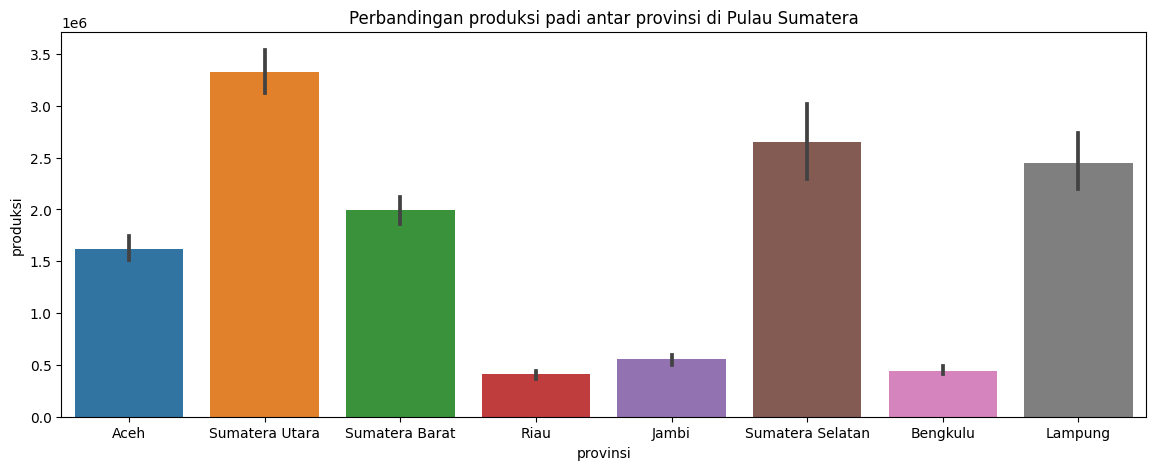

In [11]:
plt.figure(figsize=(14,5))
sns.barplot(df, x='provinsi', y='produksi')
plt.title('Perbandingan produksi padi antar provinsi di Pulau Sumatera')
plt.show()

Dari hasil visualisasi tersebut kita bisa melihat bahwa provinsi Sumatera Utara merupakan provinsi dengan produksi padi terbanyak dibandingkan dengan provinsi lainnya.

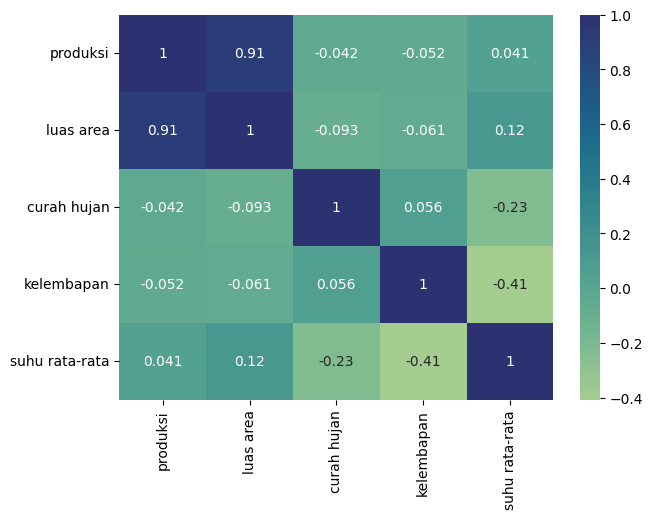

In [12]:
plt.figure(figsize=(7, 5))
sns.heatmap(df.drop(['provinsi', 'tahun'], axis=1).corr(), annot=True, cmap='crest')
plt.show()

Dari matriks korelasi, kita dapat mengetahui hubungan antara variabel independen dan variabel output. Luas lahan pertanian dan suhu rata-rata memiliki korelasi positif, yang berarti bahwa ketika nilai luas lahan pertanian meningkat, produksi juga cenderung meningkat, meskipun pengaruh suhu tidak begitu signifikan. Di sisi lain, curah hujan dan kelembaban memiliki korelasi negatif, yang berarti bahwa ketika nilai kedua variabel ini menurun, produksi cenderung meningkat. Meskipun demikian, hubungan ini tidak begitu kuat, dan perubahan dalam grafik tidak terlalu signifikan.

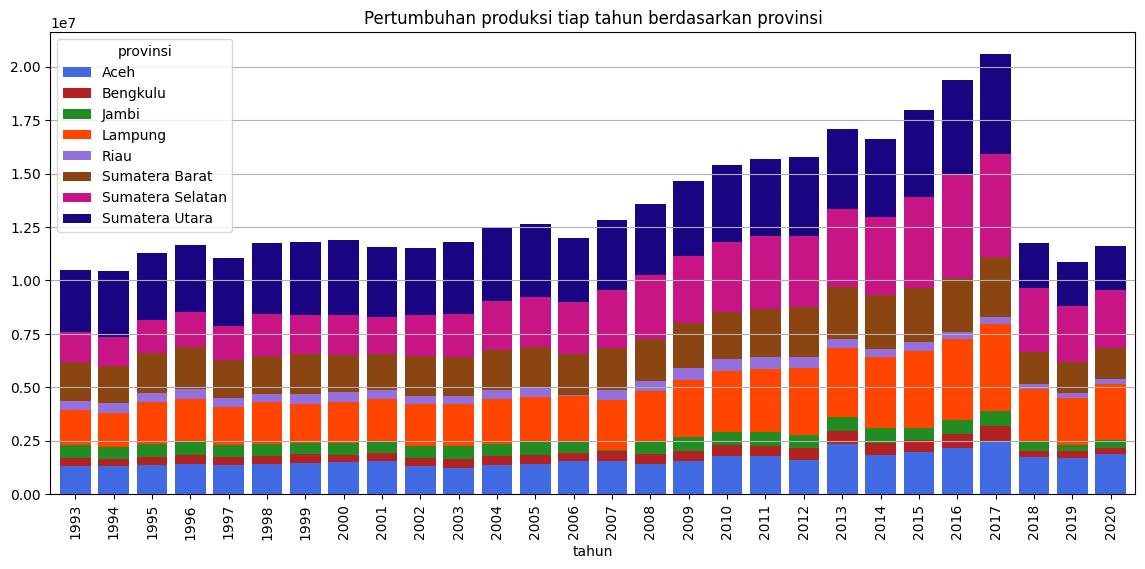

In [13]:
colors = ['#4169e1', '#b22222', '#228b22', '#ff4500', '#9370db', '#8b4513', '#c71585', '#190482']
df.pivot_table(index='tahun', columns='provinsi', values='produksi').plot.bar(width=0.8, stacked=True, figsize=(14, 6), color=colors)
plt.title("Pertumbuhan produksi tiap tahun berdasarkan provinsi")
plt.grid(axis='y', which='major')
# plt.legend(loc='best')
plt.show()

Produksi padi di Pulau Sumatera meningkat dari tahun 2003 hingga 2017, tetapi setelah itu mengalami penurunan yang signifikan.

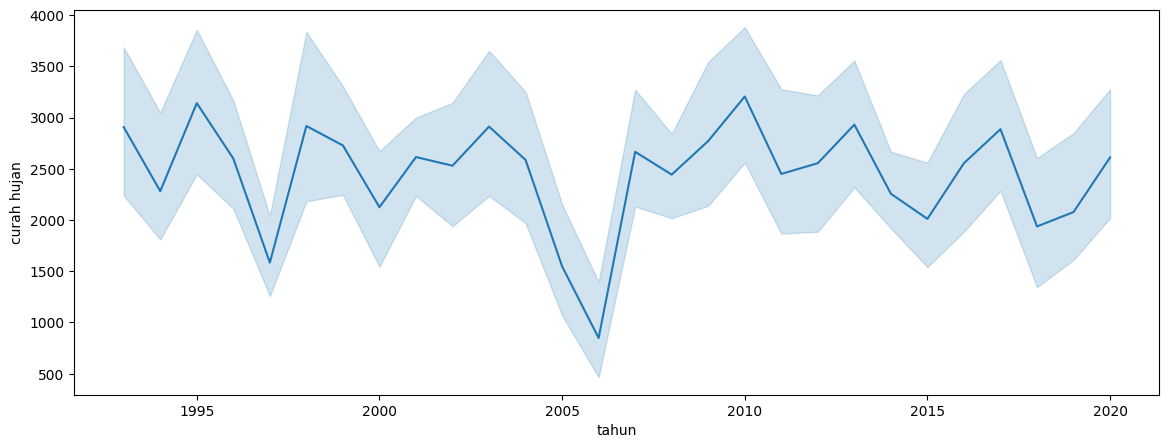

In [14]:
plt.figure(figsize=(14, 5))
sns.lineplot(df, x='tahun', y='curah hujan')
plt.show()

Setelah tahun 2005 terjadi penurunan curah hujan secara drastis dan mengalami kenaikan kembali menjadi rata-rata sampai dengan tahun 2020

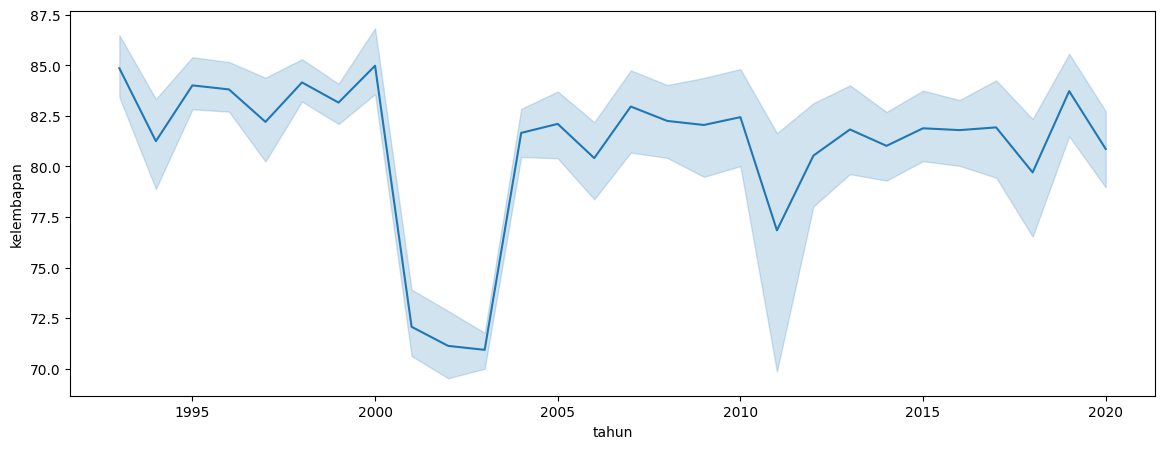

In [15]:
plt.figure(figsize=(14, 5))
sns.lineplot(df, x='tahun', y='kelembapan')
plt.show()

Pada tahun 2000 sampai 2005 terjadi penurunan secara signifikan setelah mengalami tingginya tingkat kelembapan.

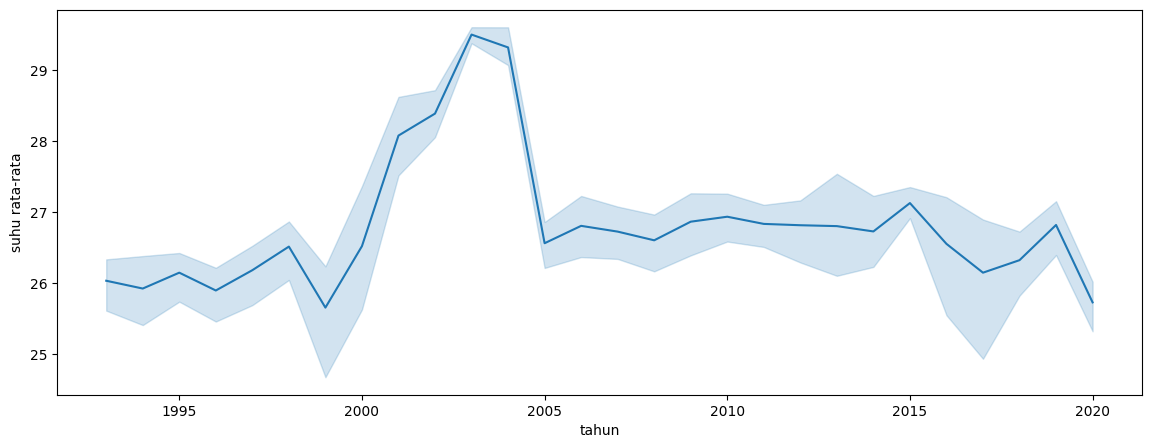

In [16]:
plt.figure(figsize=(14, 5))
sns.lineplot(df, x='tahun', y='suhu rata-rata')
plt.show()

Terjadi kenaikan suhu rata-rata pada tahun 2000 sampai 2005 dan kembali stagnan pada tahun 2005 sampai 2015 dengan sedikit perubahan kenaikan suhu rata-rata.

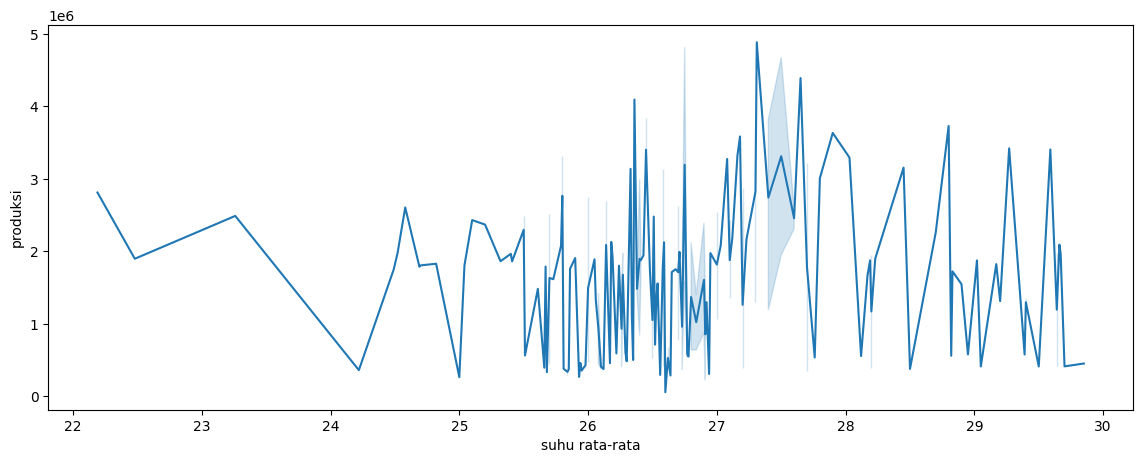

In [17]:
plt.figure(figsize=(14, 5))
sns.lineplot(df, x='suhu rata-rata', y='produksi')
plt.show()

Dalam suhu rata-rata 26-27 terjadi perubahan produksi yang berubah-ubah dibandingkan dengan suhu rata-rata 22-23.

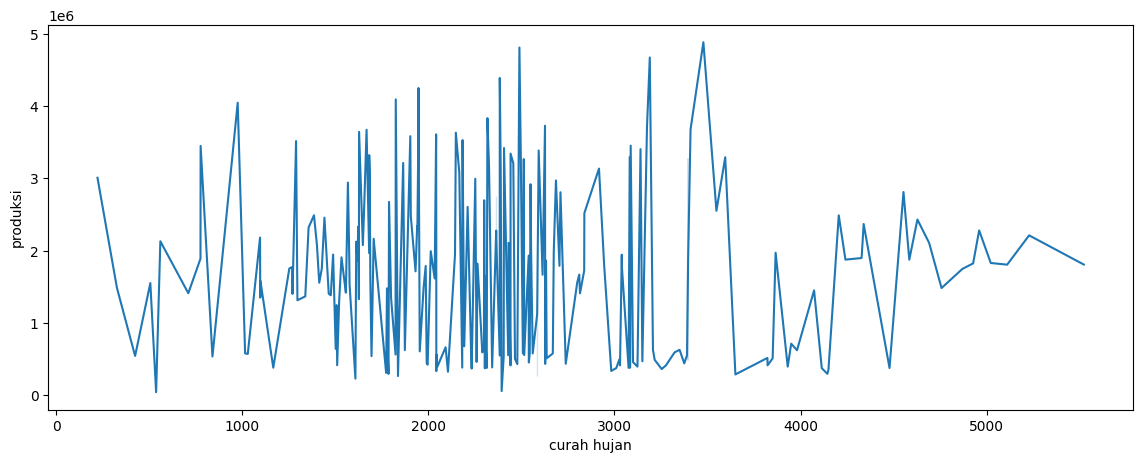

In [18]:
plt.figure(figsize=(14, 5))
sns.lineplot(df, x='curah hujan', y='produksi')
plt.show()

Produksi sangat meningkat ketika curah hujan mencapai lebih dari 2000 dan tidak lebih dari 3500. Namun tidak semuanya mengalami peningkatan. Hanya beberapa titik curah hujan saja yang terjadinya peningkatan dan penurunan secara signifikan.

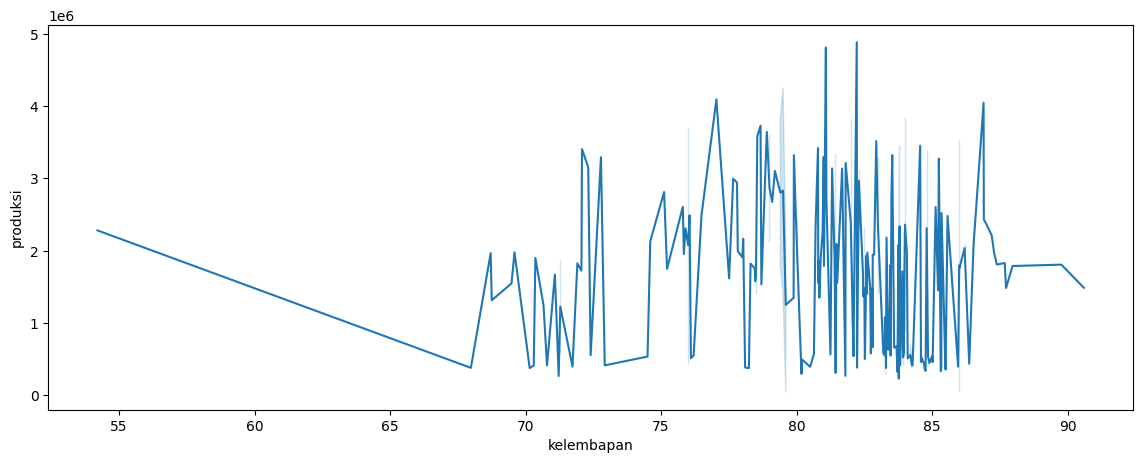

In [19]:
plt.figure(figsize=(14, 5))
sns.lineplot(df, x='kelembapan', y='produksi')
plt.show()

Kelembaban tanah juga menjadi faktor
penting pertumbuhan padi. Apabila
kelembaban rendah saat fase reproduktif dapat
menyebabkan pembungaan terhambat. Pada grafik di atas terlihat bahwa di kelembapan 80an memiliki titik produksi tertinggi namun tidak stabil.

# Data Preprocessing (Featuring)

In [20]:
X = df.drop(['produksi','tahun', 'provinsi'], axis=1)
y = df[['produksi']]

Pada variabel independen (X), data untuk variabel produksi, tahun, dan provinsi dihapus karena tidak memiliki keterkaitan langsung dengan variabel dependen (y).

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}\n')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (179, 4)
X_test: (45, 4)

y_train: (179, 1)
y_test: (45, 1)


In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)

# Modeling

## Linear Regression

In [24]:
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

y_pred_Lr = LinReg.predict(X_test)
y_pred_Lr = pd.DataFrame(y_pred_Lr)
y_pred_Lr.sample(5)

,0
4,0.557542
19,-1.005768
10,0.055727
21,-0.031169
30,0.721490


## Decision Tree Regression

In [25]:
DTreeReg = DecisionTreeRegressor(random_state = 0)
DTreeReg.fit(X_train, y_train)

ypred_DTreeReg = DTreeReg.predict(X_test)
y_pred_DTreeReg = pd.DataFrame(ypred_DTreeReg)
y_pred_DTreeReg.head()

,0
0,-0.400946
1,-1.388808
2,-0.977200
3,0.189738
4,0.509172


# Model Evaluation

## Linear Regression

In [26]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred_Lr)
mae = mean_absolute_error(y_test, y_pred_Lr)
r2 = r2_score(y_test, y_pred_Lr)

# Menampilkan hasil evaluasi
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.07957820043080445
Mean Absolute Error: 0.2017257598897857
R-squared: 0.8698382149351499


In [27]:
data  = {
    'actual': y_test.reshape(1,-1)[0],
    'predicted': np.array(y_pred_Lr).reshape(1,-1)[0]
}

eval = pd.DataFrame(data)
eval.head()

,actual,predicted
0,-0.344773,-0.347937
1,-1.074780,-0.863702
2,-0.979998,-0.774902
3,-0.125877,0.332913
4,0.631884,0.557542


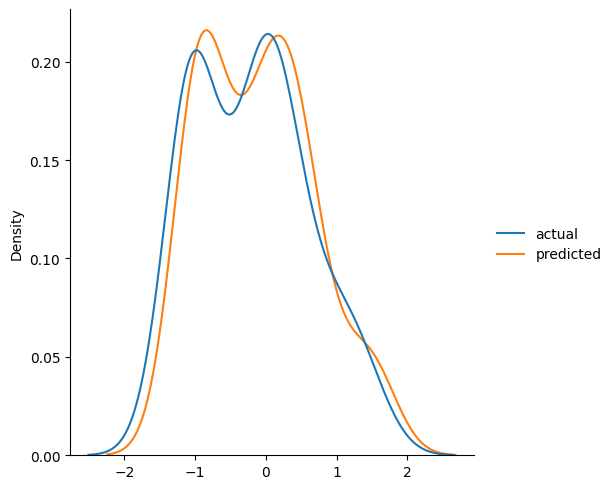

In [28]:
sns.displot(data=eval, kind="kde")
plt.show()

## Decision Tree Regression

In [29]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred_DTreeReg)
mae = mean_absolute_error(y_test, y_pred_DTreeReg)
r2 = r2_score(y_test, y_pred_DTreeReg)

# Menampilkan hasil evaluasi
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.15186475600725707
Mean Absolute Error: 0.20807026157527284
R-squared: 0.7516029814279293


In [30]:
data  = {
    'actual': y_test.reshape(1,-1)[0],
    'predicted': np.array(y_pred_DTreeReg).reshape(1,-1)[0]
}

eval = pd.DataFrame(data)
eval.head()

,actual,predicted
0,-0.344773,-0.400946
1,-1.074780,-1.388808
2,-0.979998,-0.977200
3,-0.125877,0.189738
4,0.631884,0.509172


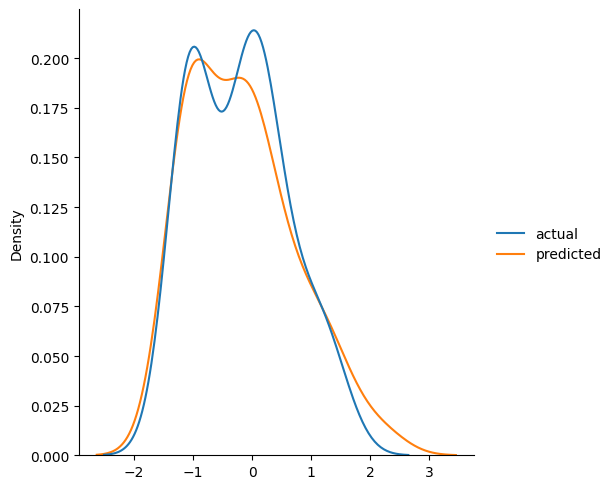

In [31]:
sns.displot(data=eval, kind="kde")
plt.show()